<a href="https://colab.research.google.com/github/ejrtks1020/Bigdata_Analysis_Certification/blob/main/T2_3_Adult_Census_Income_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

성인 인구조사 소득 예측

* age: 나이
* workclass: 고용 형태
* fnlwgt: 사람의 대표성을 나타내는 가중치(final weight)
* education: 교육 수준
* education.num: 교육 수준 수치
*marital.status: 결혼 상태
* occupation: 업종
* relationship: 가족 관계
* race: 인종
* sex: 성별
* capital.gain: 양도 소득
* capital.loss: 양도 손실
* hours.per.week: 주당 근무 시간
* native.country: 국적
* income: 수익 (예측해야 하는 값)

In [ ]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("adult.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='income', null_name='?')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 14), (6513, 14), (26048, 2), (6513, 2))

In [ ]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
21851,36,Private,241998,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States
7632,53,Private,103950,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
27878,19,Private,203061,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,25,United-States
14121,20,Private,102607,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,30,United-States
32345,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States


#My Code

In [ ]:
X_train.isnull().sum()

age                  0
workclass         1456
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1463
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     461
dtype: int64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26048 entries, 21851 to 25716
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26048 non-null  int64 
 1   workclass       24592 non-null  object
 2   fnlwgt          26048 non-null  int64 
 3   education       26048 non-null  object
 4   education.num   26048 non-null  int64 
 5   marital.status  26048 non-null  object
 6   occupation      24585 non-null  object
 7   relationship    26048 non-null  object
 8   race            26048 non-null  object
 9   sex             26048 non-null  object
 10  capital.gain    26048 non-null  int64 
 11  capital.loss    26048 non-null  int64 
 12  hours.per.week  26048 non-null  int64 
 13  native.country  25587 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.0+ MB


In [ ]:
X_train.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.610335,1.895741e+05,10.082118,1081.193796,88.477695,40.420224
std,13.628346,1.043848e+05,2.574608,7404.962675,404.689981,12.354707
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.182472e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785755e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.365968e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


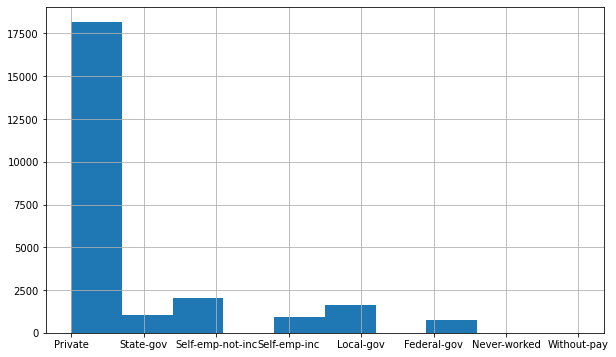

In [ ]:
X_train['workclass'].hist(figsize = (10 ,6))

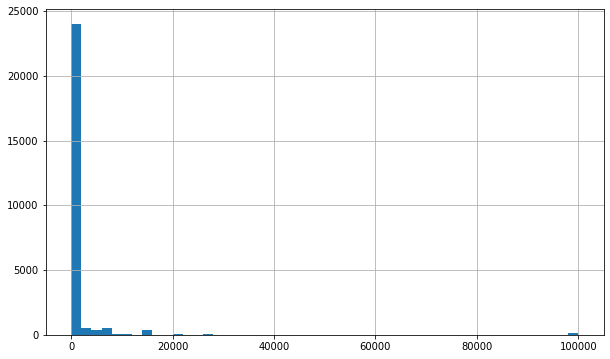

In [ ]:
X_train['capital.gain'].hist(bins = 50,figsize = (10 ,6))

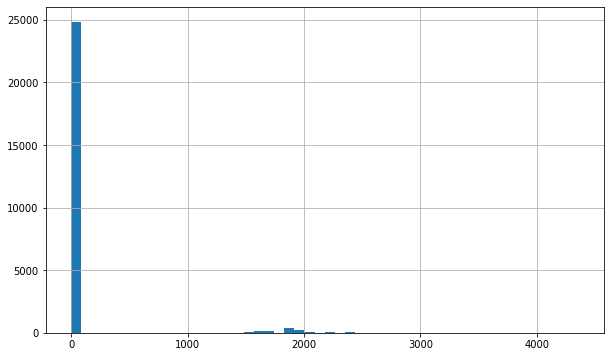

In [ ]:
X_train['capital.loss'].hist(bins = 50,figsize = (10 ,6))

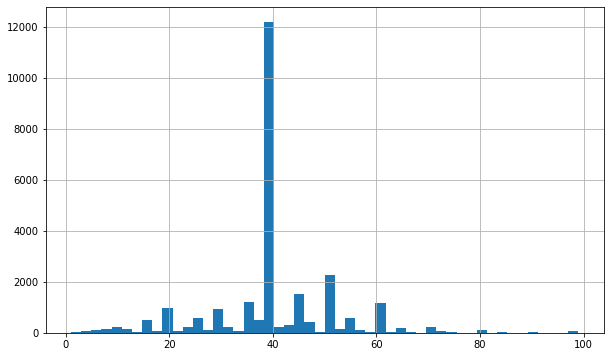

In [ ]:
X_train['hours.per.week'].hist(bins = 50,figsize = (10 ,6))

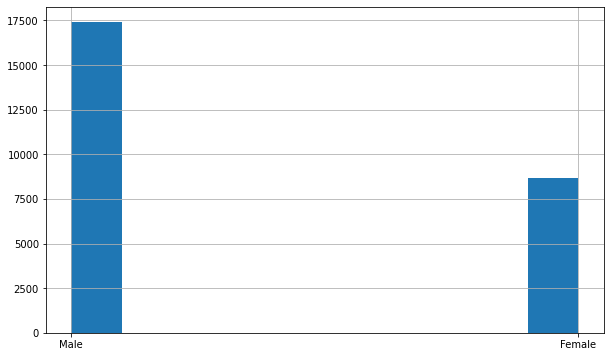

In [ ]:
X_train['sex'].hist(figsize = (10 ,6))

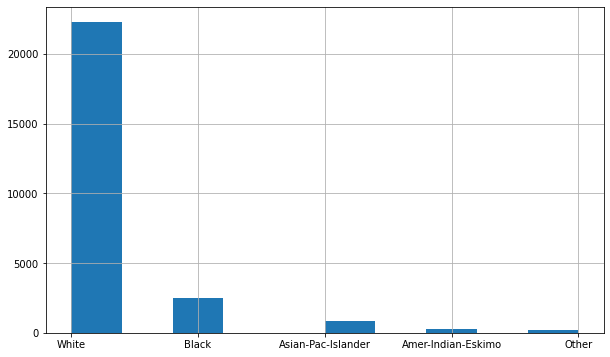

In [ ]:
X_train['race'].hist(figsize = (10 ,6))

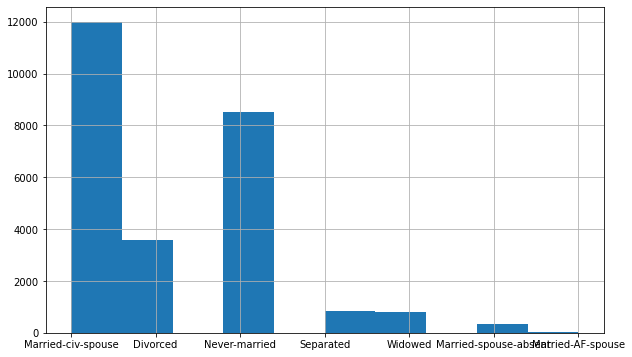

In [ ]:
X_train['marital.status'].hist(figsize = (10 ,6))

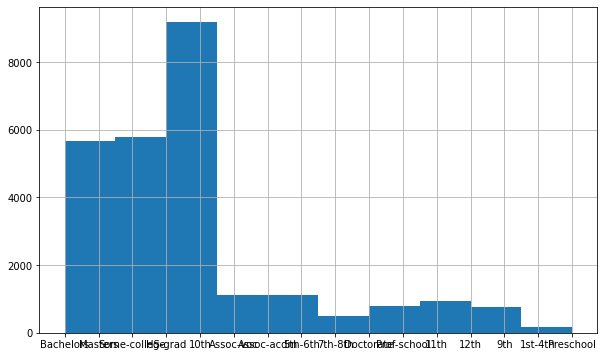

In [ ]:
X_train['education'].hist(figsize = (10 ,6))

In [ ]:
X_train.shape

(26048, 14)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train['hours.per.week_scaled'] = scaler.fit_transform(X_train[['hours.per.week']])

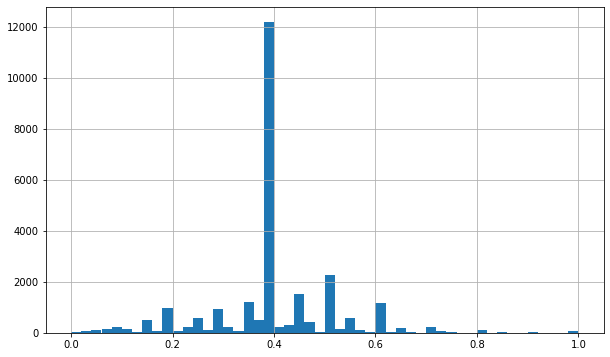

In [ ]:
X_train['hours.per.week_scaled'].hist(bins = 50,figsize = (10 ,6))

In [ ]:
drop_columns = ['capital.gain','capital.loss', 'workclass', 'occupation', 'native.country','hours.per.week', 'race']

In [ ]:
X_train_2 = X_train.drop(drop_columns, axis = 1)

In [ ]:
X_test_2 = X_test.drop(drop_columns, axis = 1)

In [ ]:
X_train_2.head()

,age,fnlwgt,education,education.num,marital.status,relationship,sex
21851,36,241998,Bachelors,13,Married-civ-spouse,Husband,Male
7632,53,103950,Masters,14,Divorced,Not-in-family,Female
27878,19,203061,Some-college,10,Never-married,Not-in-family,Female
14121,20,102607,HS-grad,9,Never-married,Own-child,Male
32345,54,138852,HS-grad,9,Married-civ-spouse,Husband,Male


In [ ]:
X_train_3 = pd.get_dummies(X_train_2)

In [ ]:
X_test3 = pd.get_dummies(X_test_2)

In [ ]:
X_train_3.head()

,age,fnlwgt,education.num,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Female,sex_Male
21851,36,241998,13,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
7632,53,103950,14,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
27878,19,203061,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
14121,20,102607,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
32345,54,138852,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
X_test3.head()

,age,fnlwgt,education.num,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Female,sex_Male
20901,58,114495,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
14170,46,247043,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1776,67,103315,14,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
30428,18,165532,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
8602,26,58039,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_3, y_train['income'])

XGBClassifier()

In [ ]:
model.score(X_train_3, y_train['income'])

0.8306587837837838

In [ ]:
pred = model.predict(X_test3)
pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '>50K'],
      dtype=object)

In [ ]:
y_test

,id,income
20901,20901,<=50K
14170,14170,>50K
1776,1776,>50K
30428,30428,<=50K
8602,8602,<=50K
...,...,...
31222,31222,<=50K
10861,10861,<=50K
8929,8929,<=50K
2066,2066,>50K


In [ ]:
submission = pd.DataFrame({'id' : y_test['id'], 'income' : pred})

In [ ]:
submission.head()

,id,income
20901,20901,<=50K
14170,14170,<=50K
1776,1776,<=50K
30428,30428,<=50K
8602,8602,<=50K


In [ ]:
submission.to_csv('submission.csv', index = False)

In [ ]:
model.score(X_test3, y_test['income'])

0.8278826961461692

#baseline code

In [ ]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
21851,36,Private,241998,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States
7632,53,Private,103950,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
27878,19,Private,203061,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,25,United-States
14121,20,Private,102607,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,30,United-States
32345,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States


In [ ]:
y_train['income'].value_counts()

<=50K    19756
>50K      6292
Name: income, dtype: int64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26048 entries, 21851 to 25716
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26048 non-null  int64 
 1   workclass       24592 non-null  object
 2   fnlwgt          26048 non-null  int64 
 3   education       26048 non-null  object
 4   education.num   26048 non-null  int64 
 5   marital.status  26048 non-null  object
 6   occupation      24585 non-null  object
 7   relationship    26048 non-null  object
 8   race            26048 non-null  object
 9   sex             26048 non-null  object
 10  capital.gain    26048 non-null  int64 
 11  capital.loss    26048 non-null  int64 
 12  hours.per.week  26048 non-null  int64 
 13  native.country  25587 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.2+ MB


In [ ]:
# 피쳐 구분
# Numeric features
numeric_features = [
                    'age',
                    'fnlwgt',
                    'education.num',
                    'capital.gain',
                    'capital.loss',
                    'hours.per.week',
]

# Categorical features
cat_features = [
                'workclass',
                'education',
                'marital.status',
                'occupation',
                'relationship',
                'race',
                'sex',
                'native.country'
]

In [ ]:
X_train[numeric_features].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.610335,1.895741e+05,10.082118,1081.193796,88.477695,40.420224
std,13.628346,1.043848e+05,2.574608,7404.962675,404.689981,12.354707
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.182472e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785755e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.365968e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
X_train[cat_features].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,24592,26048,26048,24585,26048,26048,26048,25587
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
freq,18160,8408,11987,3323,10558,22270,17400,23381


결측치 처리

In [ ]:
X_train.isnull().sum()

age                  0
workclass         1456
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1463
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     461
dtype: int64

In [ ]:
X_test.isnull().sum()

age                 0
workclass         380
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        380
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    122
dtype: int64

In [ ]:
X_train['workclass'].value_counts()

Private             18160
Self-emp-not-inc     2049
Local-gov            1648
State-gov            1037
Self-emp-inc          909
Federal-gov           770
Without-pay            12
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
X_train['occupation'].value_counts()

Exec-managerial      3323
Prof-specialty       3306
Craft-repair         3296
Adm-clerical         3037
Sales                2898
Other-service        2624
Machine-op-inspct    1584
Transport-moving     1257
Handlers-cleaners    1080
Farming-fishing       786
Tech-support          746
Protective-serv       521
Priv-house-serv       119
Armed-Forces            8
Name: occupation, dtype: int64

In [ ]:
X_train['native.country'].value_counts()

United-States                 23381
Mexico                          516
Philippines                     158
Germany                         108
Canada                           88
Puerto-Rico                      87
El-Salvador                      76
India                            73
Cuba                             73
England                          69
Italy                            63
South                            62
Jamaica                          59
Vietnam                          57
China                            57
Guatemala                        54
Dominican-Republic               51
Japan                            49
Poland                           47
Columbia                         44
Taiwan                           37
Haiti                            37
Iran                             34
Portugal                         32
Peru                             29
Nicaragua                        27
Ecuador                          25
Greece                      

* 결측치는 최빈값과 나머지가 차이가 크면 최빈값으로 값이 비슷하면 별도의 값으로 대체함

In [ ]:
df['workclass'].mode()

0    Private
dtype: object

In [ ]:
def data_fillna(df):
  df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
  df['occupation'] = df['occupation'].fillna('null')
  df['native.country'] = df['native.country'].fillna(df['native.country'].mode()[0])

  return df

In [ ]:
X_train = data_fillna(X_train)
x_test = data_fillna(X_test)

X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

Feature Engineering

In [ ]:
X_train.assign(ind = 'train')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,ind
21851,36,Private,241998,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,train
7632,53,Private,103950,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,train
27878,19,Private,203061,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,25,United-States,train
14121,20,Private,102607,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,30,United-States,train
32345,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,45,Private,187370,Masters,14,Divorced,Exec-managerial,Unmarried,White,Male,7430,0,70,United-States,train
17536,36,Private,174308,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,train
6201,47,Private,275361,Assoc-acdm,12,Widowed,Other-service,Own-child,White,Female,0,0,35,United-States,train
27989,50,Self-emp-not-inc,196504,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,23,United-States,train


In [ ]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

all_df = pd.concat([X_train.assign(ind = 'train'), X_test.assign(ind = 'test')]) #잠깐 학습데이터와 테스트데이터를 합치기 위해 식별자 추가
le = LabelEncoder()
all_df[cat_features] = all_df[cat_features].apply(le.fit_transform)

X_train = all_df[all_df['ind'] == 'train']
X_train = X_train.drop('ind', axis = 1)
X_train


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
21851,36,3,241998,9,13,2,2,0,4,1,0,0,50,38
7632,53,3,103950,12,14,0,9,1,4,0,0,0,40,38
27878,19,3,203061,15,10,4,12,1,4,0,0,0,25,38
14121,20,3,102607,11,9,4,5,3,4,1,0,0,30,38
32345,54,6,138852,11,9,2,9,0,4,1,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,45,3,187370,12,14,0,3,4,4,1,7430,0,70,38
17536,36,3,174308,1,7,0,13,1,4,1,0,0,40,38
6201,47,3,275361,7,12,6,7,3,4,0,0,0,35,38
27989,50,5,196504,10,16,2,9,0,4,1,0,0,23,38


In [ ]:
X_test = all_df[all_df['ind'] == 'test']
X_test = X_test.drop('ind', axis = 1)
X_test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
20901,58,3,114495,11,9,2,3,0,4,1,0,0,40,38
14170,46,3,247043,11,9,2,13,0,4,1,0,0,40,38
1776,67,1,103315,12,14,4,3,2,4,0,15831,0,72,38
30428,18,3,165532,15,10,4,11,3,4,1,0,0,15,38
8602,26,6,58039,15,10,2,7,0,4,1,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31222,22,3,199426,15,10,4,14,1,4,0,0,0,40,38
10861,41,3,155106,11,9,2,5,0,4,1,0,0,40,38
8929,32,3,153078,9,13,4,7,1,1,1,0,0,40,34
2066,48,6,171926,14,15,2,9,0,4,1,15024,0,50,38


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26048 entries, 21851 to 25716
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             26048 non-null  int64
 1   workclass       26048 non-null  int64
 2   fnlwgt          26048 non-null  int64
 3   education       26048 non-null  int64
 4   education.num   26048 non-null  int64
 5   marital.status  26048 non-null  int64
 6   occupation      26048 non-null  int64
 7   relationship    26048 non-null  int64
 8   race            26048 non-null  int64
 9   sex             26048 non-null  int64
 10  capital.gain    26048 non-null  int64
 11  capital.loss    26048 non-null  int64
 12  hours.per.week  26048 non-null  int64
 13  native.country  26048 non-null  int64
dtypes: int64(14)
memory usage: 3.0 MB


In [ ]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
21851,0.260274,3,0.156011,9,0.800000,2,2,0,4,1,0.000000,0.0,0.500000,38
7632,0.493151,3,0.062255,12,0.866667,0,9,1,4,0,0.000000,0.0,0.397959,38
27878,0.027397,3,0.129566,15,0.600000,4,12,1,4,0,0.000000,0.0,0.244898,38
14121,0.041096,3,0.061343,11,0.533333,4,5,3,4,1,0.000000,0.0,0.295918,38
32345,0.506849,6,0.085958,11,0.533333,2,9,0,4,1,0.000000,0.0,0.397959,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,0.383562,3,0.118910,12,0.866667,0,3,4,4,1,0.074301,0.0,0.704082,38
17536,0.260274,3,0.110039,1,0.400000,0,13,1,4,1,0.000000,0.0,0.397959,38
6201,0.410959,3,0.178669,7,0.733333,6,7,3,4,0,0.000000,0.0,0.346939,38
27989,0.452055,5,0.125113,10,1.000000,2,9,0,4,1,0.000000,0.0,0.224490,38


In [ ]:
X_test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
20901,0.561644,3,0.069416,11,0.533333,2,3,0,4,1,0.000000,0.0,0.397959,38
14170,0.397260,3,0.159437,11,0.533333,2,13,0,4,1,0.000000,0.0,0.397959,38
1776,0.684932,1,0.061823,12,0.866667,4,3,2,4,0,0.158312,0.0,0.724490,38
30428,0.013699,3,0.104078,15,0.600000,4,11,3,4,1,0.000000,0.0,0.142857,38
8602,0.123288,6,0.031074,15,0.600000,2,7,0,4,1,0.000000,0.0,0.397959,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31222,0.068493,3,0.127098,15,0.600000,4,14,1,4,0,0.000000,0.0,0.397959,38
10861,0.328767,3,0.096997,11,0.533333,2,5,0,4,1,0.000000,0.0,0.397959,38
8929,0.205479,3,0.095620,9,0.800000,4,7,1,1,1,0.000000,0.0,0.397959,34
2066,0.424658,6,0.108421,14,0.933333,2,9,0,4,1,0.150242,0.0,0.500000,38


In [ ]:
# target값 변경
y = (y_train['income'] != '<=50K').astype(int)
y[:5]

21851    1
7632     0
27878    0
14121    0
32345    0
Name: income, dtype: int64

검증용 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, y, test_size=0.15, random_state = 2021)
X_tr.shape, X_vld.shape, y_tr.shape, y_vld.shape

((22140, 14), (3908, 14), (22140,), (3908,))

모델 & 평가

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state = 2022)
model.fit(X_tr, y_tr)
pred = model.predict(X_vld)
print('accuracy score:' , accuracy_score(y_vld, pred))

accuracy score: 0.8119242579324463


In [ ]:
model.score(X_vld, y_vld)

0.8119242579324463

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 2022)
model.fit(X_tr, y_tr)
pred = model.predict(X_vld)
print('accuracy score:',accuracy_score(y_vld, pred))

accuracy score: 0.8480040941658137


In [ ]:
y_test = (y_test['income'] != '<=50K').astype(int)
pred = model.predict(X_test)

print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.8569015814524796
